# Modelling Death with COVID 19

Using the following differential equations, we will use Euler's method to analyze the number of deaths. Let $S$ denote the susceptible population, $I$ denote the infected, $R$ the recovered, and $D$ for dead. 

Use the following differential equations 

$$  \frac{ \partial S}{\partial t} = -\rho S I  $$
$\quad$
$$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I - \eta I $$
$\quad$
$$ \frac{ \partial D}{\partial t} = \eta I  $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I $$

and model 100 days using Euler's method. Note that the recovery rate $\gamma$ is the greek symbol called gamma, the death rate $\eta$ is the greek symbol called eta, the infection rate $\rho$ is rho.

In [3]:
import numpy as np 
import matplotlib.pyplot as pyplot

In [4]:
def create_t():
    """A function that returns 1000 evenly spaced points between 0, and 100"""
    t = np.linspace(0,100,1000)
    return(t)

In [5]:
def dS_dt(rho,t_i,S_i,I_i):
    """Differential equation for Susceptible Population, takes in 
    rho -> infection rate, float
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = -rho*S_i*I_i
    return(result)

In [6]:
def dI_dt(rho,gamma,eta,t_i,S_i,I_i):
    """Differential equation for Infected Population, takes in 
    rho -> infection rate, float
    gamma -> recovery rate, float 
    eta -> death rate, float 
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = rho*S_i*I_i - gamma*I_i - eta*I_i
    return(result)

In [7]:
def dD_dt(eta,t_i,I_i):
    """Differential equation for Death Population, takes in 
    eta -> death rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = eta*I_i
    return(result)

In [8]:
def dR_dt(gamma,t_i,I_i):
    """Differential equation for Recovered Population, takes in 
    gamma -> recovery rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = gamma*I_i
    return(result)

Now that we have all our differential equations ready to go, we need to implement 
eulers method with our `model_pandemic` function. This function takes in the `S_o,I_o`, intial populations. These are the number of susceptible and infected. Note that these are either integer or float values. These must be greater than 0.

Finally, this function must return `S`,`I`,`R`, and `D` populations as `np.array` types.

If the number of Infected People is 0 at any point in time, then this function must break and return the corresponding values. 

If there is no one left to die, then this function must break and return the corresponding values. 

If there is no one left to recover, then this function must break and return the corresponding values.

In [9]:
def model_pandemic(S_o,I_o):
    """ 
    Model pandemic function which uses euler's method to calculate S,I,R, and D populations.
    
    This function models up to 100 days. 
    
    """
   
    rho = 0.001
    gamma = 0.05
    eta = 0.001 
    
    t = create_t()
    h = t[1]-t[0]
    
    S = np.array([S_o])
    I = np.array([I_o])
    R = np.array([0.0])
    D = np.array([0.0])
    for i in range(1,len(t)+1):        
        S_new = S[i-1] + h* dS_dt(rho,t[i-1],S[i-1],I[i-1])
        I_new = I[i-1] + h* dI_dt(rho,gamma,eta,t[i-1],S[i-1],I[i-1])
        R_new = R[i-1] + h* dR_dt(gamma,t[i-1],I[i-1])
        D_new = D[i-1] + h* dD_dt(eta,t[i-1],I[i-1])
       
        S = np.append(S, S_new)
        I = np.append(I, I_new)
        R = np.append(R, R_new)
        D = np.append(D, D_new)
        if I[i] == 0:
            break
    return (S,I,R,D)

In [10]:
S,I,R,D = model_pandemic(100,10)

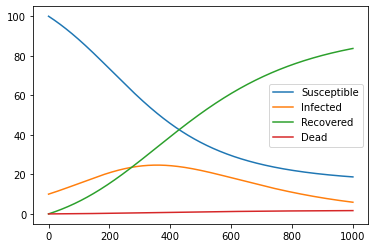

In [11]:
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

Now that we have built the SIR models, we will now take a look at when a vaccine is in effect. 

Suppose that a vaccine is developed 25 days into the pandemic, therefore the form of the differential equations for $S$ and $R$ must change to: 




$$  \frac{ \partial S}{\partial t} = -\rho S I - \beta S * \delta(t > 25) $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I + \beta S * \delta(t > 25)$$

Here: $\beta$ is a cure rate, or the rate at which we can distribute the vaccine to the susceptible population. 

Then we have $\delta$. This is an indicator function that checks whether or not $t$ is greater than 25. If it is, this function returns 1, if it isn't this function returns 0. 

Notice how if the indicator function is 0, the cure rate portion of the model is removed, and we have the original differential equation that we had previously!


Beyond 25 days, we have the vaccine, and therefore our differential equation function changes!


We can generalize this function to have some arbitrary $v_t$ time, as in vaccine time, to symbolize the time a vaccine is found as: 



$$  \frac{ \partial S}{\partial t} = -\rho S I - \beta S * \delta(t > v_t) $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I + \beta S * \delta(t > v_t)$$



We are going to code our own indicator function `delta` that takes in float values `t_i`, `v_t`, and returns 1 or 0, based on the cutoff rate `v_t`. 

In [14]:
def delta(t_i,v_t):
    """ check to see if time t_i has exceeded v_t  """
    check = (t_i > v_t)
    return (check)

In [15]:
assert delta(50,20) == True

In [18]:
# next we need to make an adjustment to the following functions!
def dSV_dt(rho,beta,t_i,v_t,S_i,I_i):
    """Differential equation for Susceptible Population, takes in 
    rho -> infection rate, float
    beta -> cure rate, float 
    v_t -> vaccine time, float
    t_i -> time at iteration i, float 
    S_i -> susceptible population at time i, float 
    I_i -> infect population time i float 
    """
    result = -rho*S_i*I_i - beta*S_i*delta(t_i,v_t)  
    return(result)

In [19]:
def dRV_dt(gamma,beta,t_i,v_t,I_i,S_i):
    """Differential equation for Recovered Population, takes in 
    gamma -> recovery rate, float
    beta -> cure rate, float 
    t_i -> time at iteration i, float 
    I_i -> infect population time i float 
    """
    result = gamma*I_i + beta*S_i*delta(t_i , v_t) 
    return(result)

In [21]:
def model_pandemic(S_o,I_o,v_t):
   
    rho = 0.001 # infection rate
    gamma = 0.05 # recovery rate
    eta = 0.001 # death rate
    beta = 0.025 # cure rate
    
    t = create_t()
    h= t[1] - t[0]
    S = np.array([S_o])
    I = np.array([I_o])
    R = np.array([0.0])
    D = np.array([0.0])
    for i in range(1,len(t)+1):        
        S_new = S[i-1] + h* dSV_dt(rho,beta,t[i-1],v_t,S[i-1],I[i-1])
        I_new = I[i-1] + h* dI_dt(rho,gamma,eta,t[i-1],S[i-1],I[i-1])
        R_new = R[i-1] + h* dRV_dt(gamma,beta,t[i-1],v_t,I[i-1],S[i-1])
        D_new = D[i-1] + h* dD_dt(eta,t[i-1],I[i-1])
       
        S = np.append(S, S_new)
        I = np.append(I, I_new)
        R = np.append(R, R_new)
        D = np.append(D, D_new)
        if I[i] == 0:
            break
    return (S,I,R,D)

In [22]:
S,I,R,D = model_pandemic(100,10,25)

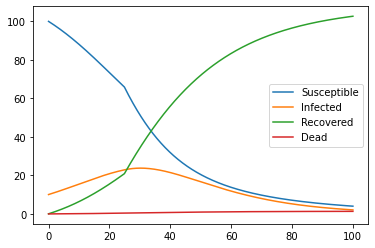

In [23]:
# plotting these results
s_t = len(S[1:]) 
pyplot.plot(create_t()[0:s_t],S[1:],label = "Susceptible")
pyplot.plot(create_t()[0:s_t],I[1:],label = "Infected")
pyplot.plot(create_t()[0:s_t],R[1:],label = "Recovered")
pyplot.plot(create_t()[0:s_t],D[1:],label = "Dead")
pyplot.legend()

Now we will model the pandemic using a probabilistic system, to do this, we will 
have to change the differential equations to include random variables
Suppose our parameters are drawn from a random variable. At every step, we draw can draw
$\rho$ from an exponential distribution with rate parameter equal to $0.001$. Formally we write this as
$$\rho \sim Exp(0.001) $$

so at every step we draw a new infection rate from this distribution. We can use the 
`np.random.exp` function to do this. Lets create a function called `draw_rho` that takes in `rho` as an input and returns a random draw from this distribution. 

In [25]:
def draw_rho(rho):
# Takes in a rho parameter and draws from an exponential distribution 
    result = np.random.exponential(rho)
    return(result)

In [27]:
np.random.seed(1794) # this forces the system to draw specific random numbers,  
assert draw_rho(0.001) == 0.0011446000111932104
np.random.seed() # this forces the system back to drawing random numbers normally.

Now we will create functions for $\gamma$ and $\eta$, they will all be named similarly as `draw_rho`, and will also draw from an exponential distribution. 

In [28]:
def draw_gamma(gamma):
    result = np.random.exponential(gamma)
    return(result)

In [29]:
def draw_eta(eta):
    result = np.random.exponential(eta)
    return(result)

In [31]:
np.random.seed(1804) # this forces the system to draw specific random numbers, 
assert draw_gamma(0.05) == 0.0372456510941877
np.random.seed() # this forces the system back to drawing random numbers normally.

In [33]:
np.random.seed(1804) # this forces the system to draw specific random numbers,  
assert draw_eta(0.001) == 0.000744913021883754
np.random.seed() # this forces the system back to drawing random numbers normally.

So now we have the following model! 
$$\rho \sim Exp(0.001)$$
$$\gamma \sim Exp(0.05) $$
$$\eta \sim Exp(0.001) $$

$\quad$

$$  \frac{ \partial S}{\partial t} = -\rho S I  $$
$\quad$
$$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I - \eta I $$
$\quad$
$$ \frac{ \partial D}{\partial t} = \eta I  $$
$\quad$
$$ \frac{ \partial R}{\partial t} =  \gamma I $$

This means that every iteration of the for loop you must call the draw functions to draw the new parameters!. Use the `model_pandemic` function from the previous question but add the new random variable draws at every loop. 

In [35]:
def model_pandemic(S_o,I_o):
    
    rho_rate = 0.001 # this will be called in draw_rho
    gamma_rate = 0.05 # this will be called in draw_gamma
    eta_rate = 0.001  # this will be called in draw_eta at every loop
    
    t = create_t()
    h= t[1] - t[0]
    S = np.array([S_o])
    I = np.array([I_o])
    R = np.array([0.0])
    D = np.array([0.0])
    for i in range(1,len(t)+1):        
        rho = draw_rho (rho_rate)
        gamma = draw_gamma (gamma_rate)
        eta = draw_eta (eta_rate)
        S_new = S[i-1] + h* dS_dt(rho,t[i-1],S[i-1],I[i-1])
        I_new = I[i-1] + h* dI_dt(rho,gamma,eta,t[i-1],S[i-1],I[i-1])
        R_new = R[i-1] + h* dR_dt(gamma,t[i-1],I[i-1])
        D_new = D[i-1] + h* dD_dt(eta,t[i-1],I[i-1])
       
        S = np.append(S, S_new)
        I = np.append(I, I_new)
        R = np.append(R, R_new)
        D = np.append(D, D_new)
        if I[i] == 0:
            break
   
    return (S,I,R,D)

In [36]:
S,I,R,D = model_pandemic(100,10)

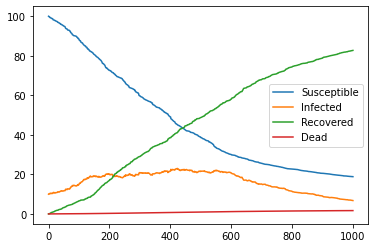

In [37]:
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

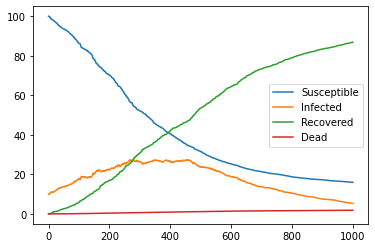

In [38]:
# this one 
S,I,R,D = model_pandemic(100,10)
# plotting these results
pyplot.plot(S,label = "Susceptible")
pyplot.plot(I,label = "Infected")
pyplot.plot(R,label = "Recovered")
pyplot.plot(D,label = "Dead")
pyplot.legend()

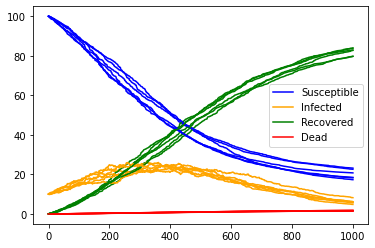

In [40]:
# lets plot a bunch of trajectories at once 
pyplot.plot(S,label = "Susceptible",color="blue")
pyplot.plot(I,label = "Infected",color = "orange")
pyplot.plot(R,label = "Recovered",color = "green")
pyplot.plot(D,label = "Dead",color = "red")
pyplot.legend()

for i in range(0,5):
    S,I,R,D = model_pandemic(100,10)
    pyplot.plot(S,label = "Susceptible",color="blue")
    pyplot.plot(I,label = "Infected",color = "orange")
    pyplot.plot(R,label = "Recovered",color = "green")
    pyplot.plot(D,label = "Dead",color = "red")

Write a function called `acquire_mean_traj` which takes in `runs` the number of runs, and returns `SM`,`IM`,`RM`,`DM`, an `np.array` types.  Where each return is the mean of the total number of runs. Note that this is not a single number, it is a `np.array` with the mean entry for each time step t across all runs!. You should use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`. 

In [41]:
def acquire_mean_traj(runs):
    """ Get the mean trajectory across all runs"""
    SM,IM,RM,DM = model_pandemic(100,10)
    SM = np.array ([SM])
    IM = np.array ([IM])
    RM = np.array ([RM])
    DM = np.array ([DM])
    
    for i in range(runs-1):
        S,I,R,D = model_pandemic(100,10)
        SM = np.append (SM,[S],axis = 0)
        IM = np.append (IM,[I],axis = 0)
        RM = np.append (RM,[R],axis = 0)
        DM = np.append (DM,[D],axis = 0)
        
    SM = np.mean(SM, axis=0)
    IM = np.mean(IM, axis=0)
    RM = np.mean(RM, axis=0)
    DM = np.mean(DM, axis=0)
    return(SM,IM,RM,DM)

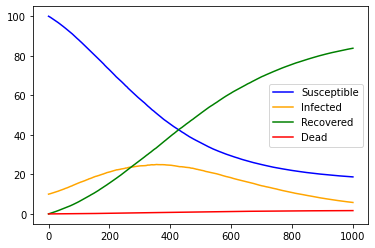

In [42]:
# get the mean trajectories of 50 runs
SM,IM,RM,DM = acquire_mean_traj(50)
# lets plot a bunch of trajectories at once 
pyplot.plot(SM,label = "Susceptible",color="blue")
pyplot.plot(IM,label = "Infected",color = "orange")
pyplot.plot(RM,label = "Recovered",color = "green")
pyplot.plot(DM,label = "Dead",color = "red")
pyplot.legend()


In [44]:
# notice how this plot is much more smooth, and resembles a deterministic model!
# This means: on average the behaviour of our probabilistic model is deterministic itself

Write a function called `acquire_worst_traj` which takes in `runs` the number of runs, and returns `SW`,`IW`,`RW`,`DW`, an `np.array` types.  This function calculates the highest number of infected cases for each run, and returns the trajectory with the highest infected case **among all runs**. This is the worst case scneario. We should use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`. 

In [45]:
def acquire_worst_traj(runs):
    """ Get the worst trajectory across all runs"""
    SW,IW,Rw,DW = model_pandemic(100,10)
    worst = max(IW)
    worst_traj = 0
    SW = np.array ([SM])
    IW = np.array ([IM])
    RW = np.array ([RM])
    DW = np.array ([DM])
    
    for i in range(runs-1):
        S,I,R,D = model_pandemic(100,10)
        if max(I) > worst:
            worst = max(I)
            worst_traj = i+1
        SW = np.append (SW,[S],axis = 0)
        IW = np.append (IW,[I],axis = 0)
        RW = np.append (RW,[R],axis = 0)
        DW = np.append (DW,[D],axis = 0)
        
    SW = SW[worst_traj]
    IW = IW[worst_traj]
    RW = RW[worst_traj]
    DW = DW[worst_traj]
    return(SW,IW,RW,DW)

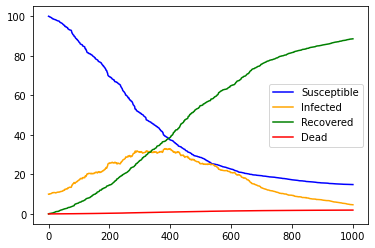

In [46]:
# get the worst case scenario of 50 runs
SW,IW,RW,DW = acquire_worst_traj(50)

# lets plot a bunch of trajectories at once 
pyplot.plot(SW,label = "Susceptible",color="blue")
pyplot.plot(IW,label = "Infected",color = "orange")
pyplot.plot(RW,label = "Recovered",color = "green")
pyplot.plot(DW,label = "Dead",color = "red")
pyplot.legend()



Write a function called `acquire_best_traj` which takes in `runs` the number of runs, and returns `SB`,`IB`,`RB`,`DB`, an `np.array` types.  This function calculates the highest number of infected cases for each run, and returns the trajectory with the lowest highest infected case **among all runs**. This is the best case scneario. We will use the `model_pandemic` function, with starting values `S_o = 100` and `I_o = 10`.

In [47]:
def acquire_best_traj(runs):
    """ Get the best trajectory across all runs"""
    SB,IB,RB,DB = model_pandemic(100,10)
    best = max(IB)
    best_traj = 0
    SB = np.array ([SM])
    IB = np.array ([IM])
    RB = np.array ([RM])
    DB = np.array ([DM])
    
    for i in range(runs-1):
        S,I,R,D = model_pandemic(100,10)
        if max(I) < best:
            best = max(I)
            best_traj = i+1
        SB = np.append (SB,[S],axis = 0)
        IB = np.append (IB,[I],axis = 0)
        RB = np.append (RB,[R],axis = 0)
        DB = np.append (DB,[D],axis = 0)
        
    SB = SB[best_traj]
    IB = IB[best_traj]
    RB = RB[best_traj]
    DB = DB[best_traj]
    return(SB,IB,RB,DB)

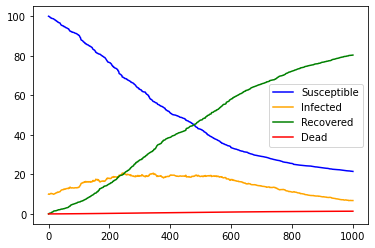

In [48]:
# get the best case scenario of 50 runs
SB,IB,RB,DB = acquire_best_traj(50)

pyplot.plot(SB,label = "Susceptible",color="blue")
pyplot.plot(IB,label = "Infected",color = "orange")
pyplot.plot(RB,label = "Recovered",color = "green")
pyplot.plot(DB,label = "Dead",color = "red")
pyplot.legend()

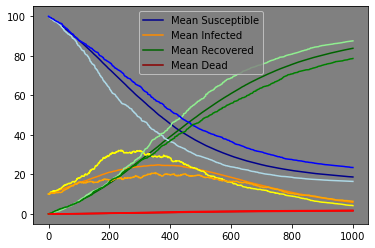

In [49]:
# plotting everything all at once
# set the seed. 
np.random.seed(1820)
# get the mean trajectories of 50 runs
SM,IM,RM,DM = acquire_mean_traj(50)
# get the worst case scenario of 50 runs
SW,IW,RW,DW = acquire_worst_traj(50)
# get the best case scenario of 50 runs
SB,IB,RB,DB = acquire_best_traj(50)
# lets plot a bunch of trajectories at once 
pyplot.rcParams['axes.facecolor'] = 'grey'
pyplot.plot(SM,label = "Mean Susceptible",color="darkblue")
pyplot.plot(IM,label = "Mean Infected",color = "darkorange")
pyplot.plot(RM,label = "Mean Recovered",color = "darkgreen")
pyplot.plot(DM,label = "Mean Dead",color = "darkred")
pyplot.legend()
pyplot.plot(SW,label = "Worst Susceptible",color="lightblue")
pyplot.plot(IW,label = "WorstInfected",color = "yellow")
pyplot.plot(RW,label = "Worst Recovered",color = "lightgreen")
pyplot.plot(DW,label = "Worst Dead",color = "red")
pyplot.plot(SB,label = "Best Susceptible",color="blue")
pyplot.plot(IB,label = "Best Infected",color = "orange")
pyplot.plot(RB,label = "Best Recovered",color = "green")
pyplot.plot(DB,label = "Best Dead",color = "red")
np.random.seed()